In [3]:
import pandas as pd

# Load the dataset
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

# Display the first few rows
df.head()

# Check for missing values
df.isnull().sum()


iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [4]:
# Filter for specific countries
df_filtered = df[df['location'].isin(['Kenya', 'USA', 'India'])]

# Convert date to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Handle missing values
df_filtered.fillna(method='ffill', inplace=True)


/tmp/ipykernel_413/412413264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
/tmp/ipykernel_413/412413264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)


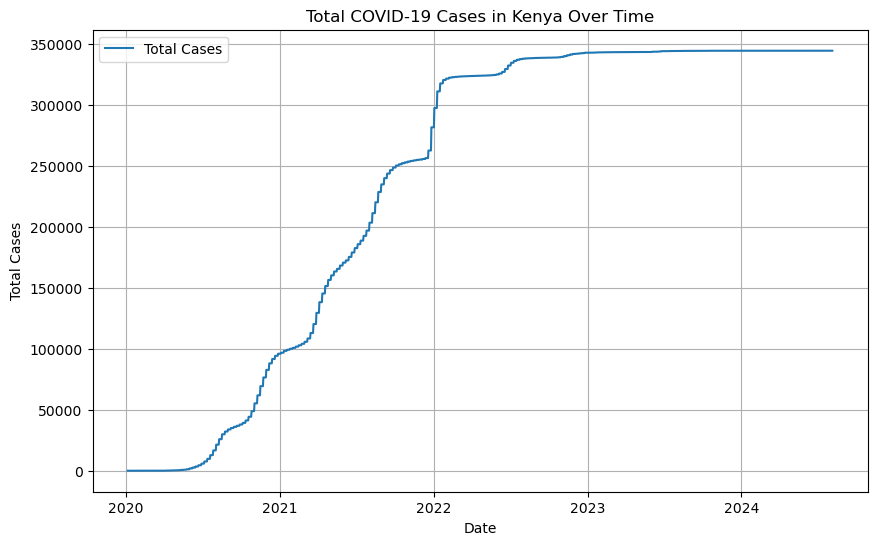

In [5]:
import matplotlib.pyplot as plt

# Plot total cases over time for Kenya
kenya_data = df_filtered[df_filtered['location'] == 'Kenya']
plt.figure(figsize=(10,6))
plt.plot(kenya_data['date'], kenya_data['total_cases'], label='Total Cases')
plt.title('Total COVID-19 Cases in Kenya Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_413/2090010013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['new_cases'] = df_filtered.groupby('location')['total_cases'].diff().fillna(0)


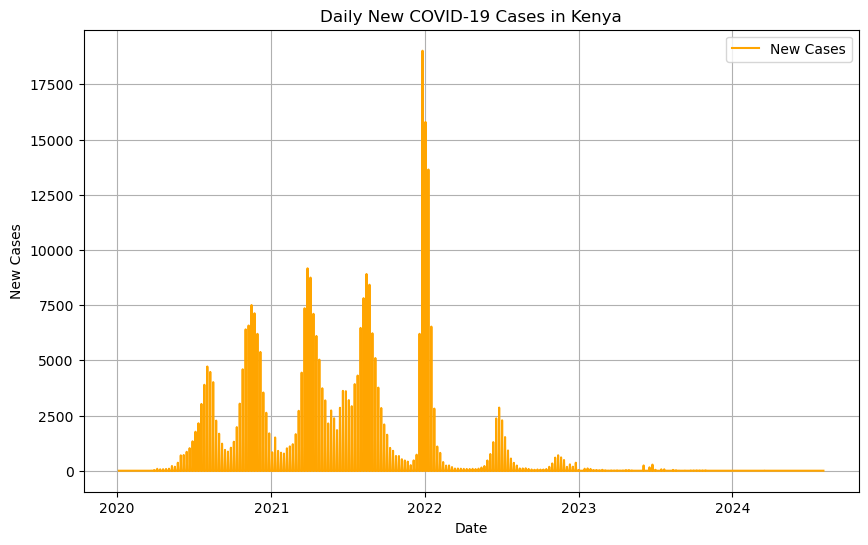

In [6]:
# Calculate daily new cases
df_filtered['new_cases'] = df_filtered.groupby('location')['total_cases'].diff().fillna(0)

# Plot daily new cases for Kenya
plt.figure(figsize=(10,6))
plt.plot(kenya_data['date'], kenya_data['new_cases'], label='New Cases', color='orange')
plt.title('Daily New COVID-19 Cases in Kenya')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()


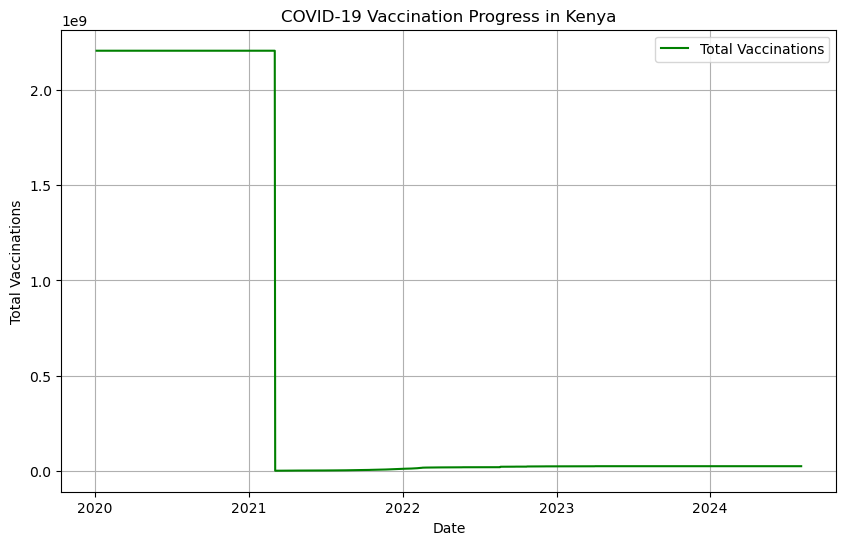

In [7]:
# Plot total vaccinations over time for Kenya
plt.figure(figsize=(10,6))
plt.plot(kenya_data['date'], kenya_data['total_vaccinations'], label='Total Vaccinations', color='green')
plt.title('COVID-19 Vaccination Progress in Kenya')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.show()
